
<a id='estspec'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Estimação de Espectros


<a id='index-1'></a>

## Conteúdo

- [Estimação de Espectros](#Estimação-de-Espectros)  
  - [Resumo](#Resumo)  
  - [Periodogramas](#Periodogramas)  
  - [Suavização](#Suavização)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Numa [aula anterior](https://julia.quantecon.org/arma.html#arma), abordamos algumas propriedades fundamentais dos processos estocásticos lineares estacionários de covariância.

Um objetivo para essa palestra era introduzir densidades espectrais - uma técnica padrão e muito útil para analisar esses processos.

Nesta palestra, abordaremos o problema de estimar densidades espectrais e outras quantidades relacionadas a partir dos dados.


<a id='index-2'> </a>
As estimativas da densidade espectral são calculadas usando o que é conhecido como periodograma - que, por sua vez, é calculado através da famosa [transformação rápida de Fourier](https://en.wikipedia.org/wiki/Fast_Fourier_transform).

Uma vez explicada a técnica básica, aplicaremos a análise de várias séries temporais macroeconômicas importantes.

Para leitura complementar, consulte [Sar87](https://julia.quantecon.org/../zreferences.html#sargent1987) ou [CC08](https://julia.quantecon.org/../zreferences.html#cryerchan2008).

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics


<a id='periodograms'></a>

## Periodogramas
<a id='periodogramas'></a>

[Relembre-se que](https://julia.quantecon.org/arma.html#arma-specd) a densidade espectral $ f $ de um processo estacionário de covariância com função de autocorrelação $ \gamma $ pode ser escrita como:

$$
f(\omega) = \gamma(0) + 2 \sum_{k \geq 1} \gamma(k) \cos(\omega k),
\qquad \omega \in \mathbb R
$$

Agora considere o problema de estimar a densidade espectral de uma determinada série temporal, quando $ \gamma $ for desconhecido.

Em particular, seja $ X_0, \ldots, X_ {n-1} $ $ observações $ consecutivas de uma única série temporal que se supõe ser estacionária de covariância.

O estimador mais comum da densidade espectral desse processo é o *periodograma* de $ X_0, \ldots, X_ {n-1} $, que é definido como:


<a id='equation-estspec-p'></a>
$$
I(\omega)
:= \frac{1}{n} \left| \sum_{t=0}^{n-1} X_t e^{i t \omega} \right|^2,
\qquad \omega \in \mathbb R \tag{1}
$$

(Lembre-se de que $ |z| $ indica o módulo do número complexo $ z $)

Como alternativa, $ I (\omega) $ pode ser expresso como:

$$
I(\omega)
= \frac{1}{n}
\left\{
\left[\sum_{t=0}^{n-1} X_t \cos(\omega t) \right]^2
+
\left[\sum_{t=0}^{n-1} X_t \sin(\omega t) \right]^2
\right\}
$$

É simples mostrar que a função $ I $ é par e $ 2
\pi $ -periódico (ou seja, $ I (\omega) = I (- \omega) $ e $ I (\omega +
2 \pi) = I (\omega) $ para todos os $ \omega \in \mathbb R $).

A partir desses dois resultados, você poderá verificar se os valores de
$ I $ em $ [0, \pi] $ determinam os valores de $ I $ em todos
$ \mathbb R $.

A próxima seção ajuda a explicar a conexão entre o periodograma e a densidade espectral.

### Interpretação


<a id='index-4'></a>
Para interpretar o periodograma, é conveniente focar em seus valores nas *frequências de Fourier*:

$$
\omega_j := \frac{2 \pi j}{n},
\quad j = 0, \ldots, n - 1
$$

Em que sentido $ I (\omega_j) $ é uma estimativa de $ f (\omega_j) $?

A resposta é direta, embora envolva alguma álgebra.

Com um pouco de esforço, pode-se mostrar que, para qualquer número inteiro $ j> 0 $,

$$
\sum_{t=0}^{n-1} e^{i t \omega_j }
= \sum_{t=0}^{n-1} \exp \left\{ i 2 \pi j \frac{t}{n} \right\} = 0
$$

Deixando $ \bar X $ denotar a amostra significa $ n ^ {- 1} \sum_ {t = 0} ^ {n-1} X_t $, temos então:

$$
n I(\omega_j)
 = \left| \sum_{t=0}^{n-1} (X_t - \bar X) e^{i t \omega_j } \right|^2
 =  \sum_{t=0}^{n-1} (X_t - \bar X) e^{i t \omega_j }
\sum_{r=0}^{n-1} (X_r - \bar X) e^{-i r \omega_j }
$$

Trabalhando cuidadosamente as somas, pode-se transformar isso em:

$$
n I(\omega_j)
=  \sum_{t=0}^{n-1} (X_t - \bar X)^2
+ 2 \sum_{k=1}^{n-1} \sum_{t=k}^{n-1} (X_t - \bar X)(X_{t-k} - \bar X)
\cos(\omega_j k)
$$

Agora seja

$$
\hat \gamma(k)
:= \frac{1}{n} \sum_{t=k}^{n-1} (X_t - \bar X)(X_{t-k} - \bar X),
\qquad k = 0,1,\ldots, n-1
$$

Essa é a função de autocovariância de amostra, o “estimador de plug-in” natural da [função de autocovariância](https://julia.quantecon.org/arma.html#arma-defs) $ \gamma $.

(“Estimador de plug-in” é um termo informal para um estimador encontrado substituindo expectativas por médias amostrais)

Com essa notação, agora podemos escrever:

$$
I(\omega_j)
=  \hat \gamma(0)
+ 2 \sum_{k=1}^{n-1} \hat \gamma(k) \cos(\omega_j k)
$$

Lembrando nossa expressão para $ f $ dado [acima](#periodogramas),
vemos que $ I (\omega_j) $ é apenas um exemplo analógico de $ f (\omega_j) $.

### Cálculo


<a id='index-5'></a>
Vamos agora considerar como calcular o periodograma conforme definido em [(1)](#equation-estspec-p).

Já existem funções disponíveis que farão isso por nós:
- um exemplo é `periodogram` no pacote` DSP.jl`.

No entanto, é muito simples replicar seus resultados, e isso nos dará uma plataforma para criar extensões úteis.

A maneira mais comum de calcular o periodograma é através da transformada discreta de Fourier,
que por sua vez é implementado através do algoritmo [fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform).

Em geral, dada uma sequência $ a_0, \ldots, a_{n-1} $, a transformação discreta de Fourier calcula a sequência:

$$
A_j := \sum_{t=0}^{n-1} a_t \exp \left\{ i 2 \pi \frac{tj}{n} \right\},
\qquad j = 0, \ldots, n-1
$$

Com $ a_0, \ldots, a_{n-1} $ armazenados na matriz Julia `a`, a chamada de função` fft (a) `retorna os valores $ A_0, \ldots, A_{n-1} $ como uma matriz Julia.

Segue-se que, quando os dados $ X_0, \ldots, X_{n-1} $ são armazenados na matriz `X`, os valores $ I (\omega_j) $ nas frequências de Fourier, dadas por:

$$
\frac{1}{n} \left| \sum_{t=0}^{n-1} X_t \exp \left\{ i 2 \pi \frac{t j}{n} \right\} \right|^2,
\qquad j = 0, \ldots, n-1
$$

podem ser computadas por `abs(fft(X)).^2 / length(X)`.

Nota: A função Julia `abs` atua de maneira elementar e manipula corretamente números complexos (calculando seu módulo, que é exatamente o que precisamos).

Uma função chamada `periodograma` que reúne tudo isso pode ser encontrada [aqui](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/estspec.jl).

Vamos gerar alguns dados para esta função usando o tipo `ARMA` de [QuantEcon.jl](https://github.com/QuantEcon/QuantEcon.jl) (consulte a [aula sobre processos lineares](https://julia.quantecon.org/arma.html#arma) para mais detalhes).

Aqui está um trecho de código que, uma vez executado o código anterior, gera dados do processo:


<a id='equation-esp-arma'></a>
$$
X_t = 0.5 X_{t-1} + \epsilon_t - 0.8 \epsilon_{t-2} \tag{2}
$$

onde $ \{\epsilon_t \} $ é ruído branco com variação de unidade e compara o periodograma à densidade espectral real.

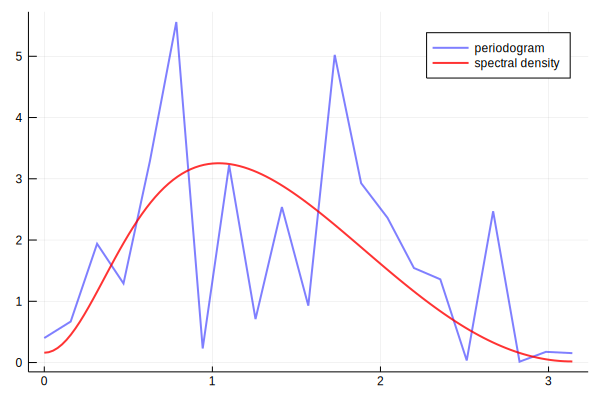

In [3]:
using QuantEcon, Plots, Random
Random.seed!(42) # Para resultados reproduzíveis.

n = 40              # Tamanho dos dados
ϕ = 0.5             # Parâmetro AR
θ = [0, -0.8]       # Parâmetro MA
σ = 1.0
lp = ARMA(ϕ, θ, σ)
X = simulation(lp, ts_length = n)

x, y = periodogram(X)
x_sd, y_sd = spectral_density(lp, two_pi=false, res=120)

plot(x, y,linecolor="blue", linewidth=2, linealpha=0.5, lab="periodogram")
plot!(x_sd, y_sd, linecolor="red", linewidth=2, linealpha=0.8, lab="spectral density")

Essa estimativa parece decepcionante, mas o tamanho dos dados é de apenas 40, portanto
talvez não seja surpreendente que a estimativa seja ruim.

No entanto, se tentarmos novamente com `n = 1200`, o resultado não será muito melhor.

<img src="https://julia.quantecon.org/time_series_models/_static/figures/periodogram1.png" style="width:50%;">


  
O periodograma é muito irregular em relação à densidade espectral subjacente.

Isso nos leva ao nosso próximo tópico.

## Suavização


<a id='index-7'></a>
Há duas questões relacionadas aqui.

Uma é que, dada a maneira como a rápida transformação de Fourier é implementada, o
número de pontos $ \omega $ nos quais $ I (\omega) $ é estimado
aumenta de acordo com a quantidade de dados.

Em outras palavras, embora tenhamos mais dados, também os estamos usando para estimar mais valores.

Uma segunda questão é que densidades de todos os tipos são fundamentalmente difíceis de
estimativa sem premissas paramétricas.


<a id='index-8'> </a>
Normalmente, a estimativa não paramétrica de densidades requer algum grau de suavização.

A maneira padrão de aplicar a suavização aos periodogramas é tomar médias locais.

Em outras palavras, o valor $ I (\omega_j) $ é substituído por um valor ponderado
média dos valores adjacentes

$$
I(\omega_{j-p}), I(\omega_{j-p+1}), \ldots, I(\omega_j), \ldots, I(\omega_{j+p})
$$

Essa média ponderada pode ser escrita como:


<a id='equation-estspec-ws'></a>
$$
I_S(\omega_j) := \sum_{\ell = -p}^{p} w(\ell) I(\omega_{j+\ell}) \tag{3}
$$

onde os pesos $ w (-p), \ldots, w (p) $ são uma sequência de $ 2p + 1 $ não negativo
valores que somam um.

Em geral, valores maiores de $ p $ indicam mais suavização - mais sobre
isso abaixo.

A próxima figura mostra o tipo de sequência normalmente usada.

Observe os pesos menores em direção às arestas e os pesos maiores no centro, para que valores mais distantes de $ I (\omega_j) $ tenham menos peso do que os valores mais próximos na soma [(3)](#equation-estspec-ws).

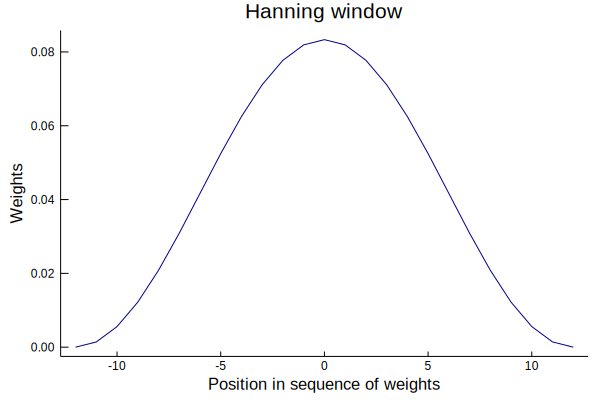

In [4]:
function hanning_window(M)
    w = [0.5 - 0.5 * cos(2 * pi * n / (M - 1)) for n = 0:(M-1)]
    return w
end

window = hanning_window(25) / sum(hanning_window(25))
x = range(-12, 12, length = 25)
plot(x, window, color="darkblue", title="Hanning window", ylabel="Weights",
    xlabel="Position in sequence of weights", legend=false, grid=false)

### Estimação com suavização


<a id='index-9'></a>
Nosso próximo passo é fornecer um código que não apenas estime o periodograma, mas também forneça a suavização conforme necessário.

Essas funções foram escritas em [estspec.jl](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/estspec.jl) e ficam disponíveis após a instalação de [QuantEcon.jl](http://quantecon.org/quantecon-jl).

A [listagem do GitHub](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/estspec.jl) exibe três funções: `smooth ()`, `periodogram ()`, `ar_periodogram () `. Discutiremos os dois primeiros aqui e o terceiro [abaixo](#ar-periodograms).

A função `periodogram ()` retorna um periodograma, opcionalmente suavizado através da função `smooth ()`.

Com relação à função `smooth ()`, uma vez que a suavização adiciona uma quantidade não trivial de computação, aplicamos um método centrado em array bastante conciso baseado em `conv`.

Os leitores podem explorar ou simplesmente usar esse código de acordo com seus interesses.

As próximas três figuras mostram periodogramas suavizados e não suavizados, bem como a população ou densidade espectral "verdadeira".

(O modelo é o mesmo de antes - veja a equação [(2)](#equation-esp-arma) - e há 400 observações)

Da figura de cima para baixo, o comprimento da janela varia de pequeno a grande.

<a id='suavização-da-janela-de-fig'></a>
<img src="https://julia.quantecon.org/time_series_models/_static/figures/window_smoothing.png" style="width:70%;">


  
Observando a figura, podemos ver que, para esse modelo e tamanho de dados, o
o comprimento da janela escolhido na figura do meio fornece o melhor ajuste.

Em relação a esse valor, o comprimento da primeira janela fornece informações insuficientes.
suavização, enquanto o terceiro dá muita suavização.

Obviamente, em problemas reais de estimativa, a verdadeira densidade espectral não é visível
e a escolha da suavização apropriada terá que ser feita com base em
julgamento/priores ou alguma outra teoria.


<a id='estspec-pfas'></a>

### Pré-filtragem e suavização


<a id='index-11'></a>
Na [listagem de códigos](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/estspec.jl), mostramos três funções do arquivo `estspec.jl`.

A terceira função no arquivo (`ar_periodogram ()`) adiciona uma etapa de pré-processamento à suavização do periodograma.

Primeiro, descrevemos a idéia básica e, depois disso, fornecemos o código.

A ideia essencial é:

1. Transforme os dados para tornar a estimativa da densidade espectral mais eficiente;
2. Calcule o periodograma associado aos dados transformados, e
3. Inverta o efeito da transformação no periodograma, para que agora estime-se a densidade espectral do processo original.


O passo 1 é chamado *pré-filtragem* ou *pré-clareamento*, enquanto o passo 3 é chamado *recoloração*.

O primeiro passo é chamado de pré-clareamento, porque 
a transformação geralmente é projetada para transformar os dados em algo mais próximo do ruído branco.

Por que isso seria desejável em termos de estimativa da densidade espectral?

O motivo é que estamos suavizando nosso periodograma estimado com base em
valores estimados em pontos próximos - lembre-se de [(3)](#equation-estspec-ws).

A suposição subjacente que faz disso uma boa idéia é que o verdadeiro
densidade espectral é relativamente regular - o valor de $ I (\omega) $ está próximo
ao de $ I (\omega') $ quando $ \omega $ estiver próximo a $ \omega' $.

Isso não será verdade em todos os casos, mas certamente é verdade para o ruído branco.

Para ruído branco, $ I $ é o mais regular possível - [é uma função constante](https://julia.quantecon.org/arma.html#arma-wnsd).

Nesse caso, valores de $ I (\omega') $ nos pontos $ \omega' $ próximos a $ \omega $
forneceu a quantidade máxima possível de informações sobre o valor $ I (\omega) $.

Outra maneira de colocar isso é que, se $ I $ for relativamente constante, podemos usar uma grande quantidade de suavização sem introduzir muito viés.


<a id='ar-periodograms'></a>

### A configuração AR(1)


<a id='index-12'></a>
Vamos examinar essa ideia com mais cuidado em um cenário específico - onde
presume-se que os dados sejam gerados por um processo AR (1).

(Configurações ARMA mais gerais podem ser tratadas usando técnicas semelhantes às descritas abaixo)

Suponha, em particular, que $ \{X_t \} $ seja covariância estacionária e AR (1),
com


<a id='equation-estspec-ar-dgp'></a>
$$
X_{t+1} = \mu + \phi X_t + \epsilon_{t+1} \tag{4}
$$

onde $ \mu $ e $ \phi \in (-1, 1) $ são parâmetros desconhecidos e $ \{\epsilon_t \} $ são ruídos brancos.

Segue-se que, se regredimos $ X_{t + 1} $ em $ X_t $ e uma interceptação, os resíduos
aproximará o ruído branco.

Seja:

- $ g $ a densidade espectral de $ \{\epsilon_t \} $ - uma função constante, conforme discutido acima;
- $ I_0 $ o periodograma estimado a partir dos resíduos - uma estimativa de $ g $, e
- $ f $ a densidade espectral de $ \{X_t\} $ - o objeto que estamos tentando estimar.


Em vista de [um resultado anterior](https://julia.quantecon.org/arma.html#arma-spec-den) que obtivemos ao discutir os processos ARMA, $ f $ e $ g $ são relacionados por:


<a id='equation-ar-sdsc'></a>
$$
f(\omega) = \left| \frac{1}{1 - \phi e^{i\omega}} \right|^2 g(\omega) \tag{5}
$$

Isso sugere que a etapa de recolorir, que construa uma estimativa de $ I $ de $ f $ a partir de $ I_0 $, defina:

$$
I(\omega) = \left| \frac{1}{1 - \hat \phi e^{i\omega}} \right|^2 I_0(\omega)
$$

onde $ \hat \phi $ é a estimativa OLS de $ \phi $.

O código para `ar_periodogram ()` - a terceira função no `estspec.jl` - faz exatamente isso. (Veja o código [aqui](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/estspec.jl)).

A figura a seguir mostra as realizações dos dois tipos de periodogramas suavizados:

1. “periodograma suavizado padrão”, o periodograma suavizado comum, e
2. “Periodogram AR suavizado”, o pré-branqueado e recolorido gerado por `ar_periodogram ()`


Os periodogramas são calculados a partir de séries temporais extraídas de [(4)](#equation-estspec-ar-dgp) com $ \mu = 0 $ e $ \phi = -0,9 $.

Cada série temporal é de comprimento 150.

A diferença entre as três sub-configurações é apenas aleatoriedade - cada uma usa um desenho diferente da série temporal.

<a id='fig-ar-smooth-periodogram'></a>
<img src="https://julia.quantecon.org/time_series_models/_static/figures/ar_smoothed_periodogram.png" style="width:70%;">


  
Em todos os casos, os periodogramas são adequados à janela "hamming" e ao comprimento da janela de 65.

Em geral, o ajuste do periodograma suavizado de RA é muito melhor, no sentido
de estar mais próximo da verdadeira densidade espectral.

## Exercícios


<a id='estspec-ex1'></a>

### Exercício 1

Replicar [esta figura](#suavização-da-janela-de-fig) (Aleatoriedade do módulo).

O modelo é como na equação [(2)](#equation-esp-arma) e existem 400 observações.

Para o periodograma suavizado, o tipo de janela é "hamming".


<a id='estspec-ex2'></a>

### Exercício 2

Replicar [esta figura](#fig-ar-smooth-periodogram) (aleatoriedade do módulo).

O modelo é como na equação [(4)](#equation-estspec-ar-dgp), com $ \mu = 0 $, $ \phi = -0,9 $
e 150 observações em cada série temporal.

Todos os periodogramas são ajustados com a janela "hamming" e o comprimento da janela de 65.

## Soluções

### Exercício 1

In [5]:
n = 400
ϕ = 0.5
θ = [0, -0.8]
σ = 1.0
lp = ARMA(ϕ, θ, 1.0)
X = simulation(lp, ts_length = n)

xs = []
x_sds = []
x_sms = []
ys = []
y_sds = []
y_sms = []
titles = []

for (i, wl) in enumerate([15, 55, 175])  # alcances da janela
    x, y = periodogram(X)
    push!(xs, x)
    push!(ys, y)

    x_sd, y_sd = spectral_density(lp, two_pi=false, res=120)
    push!(x_sds, x_sd)
    push!(y_sds, y_sd)

    x, y_smoothed = periodogram(X, "hamming", wl)
    push!(x_sms, x)
    push!(y_sms, y_smoothed)

    t = "window length = $wl"
    push!(titles, t)
end

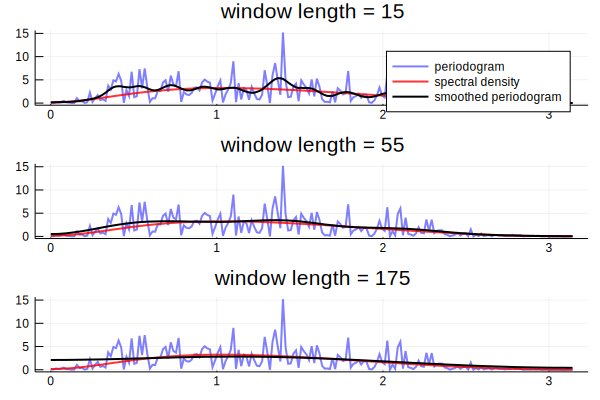

In [6]:
plot(xs, ys, layout=(3,1), color=:blue, alpha=0.5,
    linewidth=2, label=["periodogram" "" ""])
plot!(x_sds, y_sds, layout=(3,1), color=:red, alpha=0.8,
    linewidth=2, label=["spectral density" "" ""])
plot!(x_sms, y_sms, layout=(3,1), color=:black,
    linewidth=2, label=["smoothed periodogram" "" ""])
plot!(title=reshape(titles,1,length(titles)))

### Exercício 2

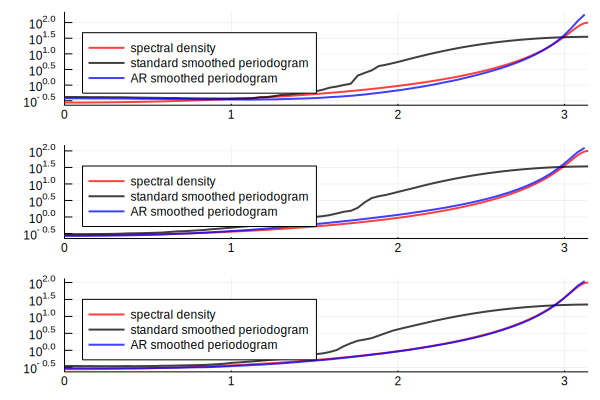

In [7]:
lp2 = ARMA(-0.9, 0.0, 1.0)
wl = 65
p = plot(layout=(3,1))

for i in 1:3
    X = simulation(lp2,ts_length=150)
    plot!(p[i],xlims = (0,pi))

    x_sd, y_sd = spectral_density(lp2,two_pi=false, res=180)
    plot!(p[i],x_sd, y_sd, linecolor=:red, linestyle=:solid,
        yscale=:log10, linewidth=2, linealpha=0.75,
        label="spectral density",legend=:topleft)

    x, y_smoothed = periodogram(X, "hamming", wl)
    plot!(p[i],x, y_smoothed, linecolor=:black, linestyle=:solid,
        yscale=:log10, linewidth=2, linealpha=0.75,
        label="standard smoothed periodogram",legend=:topleft)

    x, y_ar = ar_periodogram(X, "hamming", wl)
    plot!(p[i],x, y_ar, linecolor=:blue, linestyle=:solid,
        yscale=:log10, linewidth=2, linealpha=0.75,
        label="AR smoothed periodogram",legend=:topleft)
end
p